<a href="https://colab.research.google.com/github/nerbivol/Methods-and-systems-of-artificial-intelligence/blob/main/cnn_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 
import numpy as np 
import pandas as pd
import glob

from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
path = "/content/drive/MyDrive/Colab Data/cnn/1/*"
X_true = [cv2.imread(file) for file in glob.glob(path)]

path = "/content/drive/MyDrive/Colab Data/cnn/0/*"
X_false = [cv2.imread(file) for file in glob.glob(path)]

X = np.concatenate((X_true, X_false)) / 255
f = np.zeros((1, len(X_false)))
t = np.ones((1, len(X_true)))
Y = np.concatenate((*t, *f)).reshape(-1, 1)

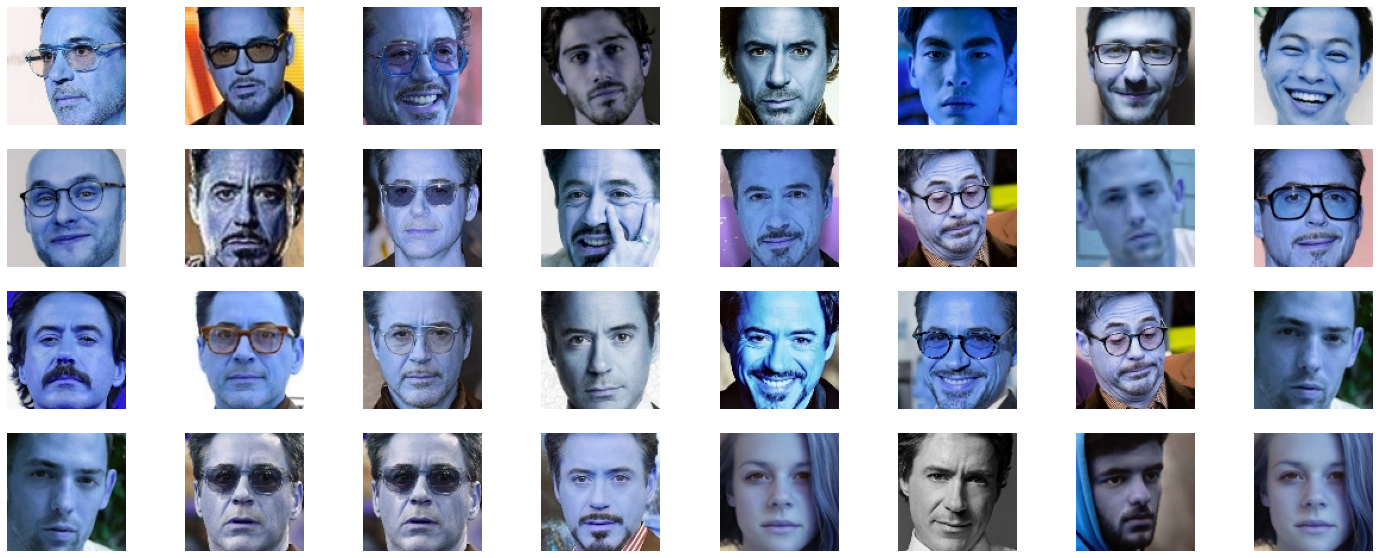

In [ ]:
fig, ax = plt.subplots(4, 8, figsize=(25, 10))

indexes = np.random.randint(len(Y), size=32)

for i, idx in enumerate(indexes):
  plt.subplot(4, 8, i+1)
  plt.imshow(X[idx])
  plt.axis("off")

In [ ]:
print("X shape: ", X.shape)
print("y shape: ", Y.shape)

X shape:  (132, 100, 100, 3)
y shape:  (132, 1)


In [ ]:
from sklearn import preprocessing

ohe = preprocessing.OneHotEncoder()

ohe.fit(Y)
y = ohe.transform(Y).toarray()

In [ ]:
y.shape

(132, 2)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape:",X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (92, 100, 100, 3)
y_train shape: (92, 2)


In [ ]:
def mish(inputs):
    x = tf.nn.softplus(inputs)
    x = tf.nn.tanh(x)
    x = tf.multiply(x, inputs)
    return x

In [ ]:
drop = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
activation = ['relu', 'leaky_relu', 'selu', mish]

In [ ]:
layers2_df = pd.DataFrame()

for a in activation:
  for d in drop:
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), input_shape=(100,100,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32, (3,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(64, activation=a),
        layers.Dropout(d),
        layers.Dense(units=2, activation='softmax'),
    ])

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

    layers2_df[f'activation: {a}, drop: {d}'] = pd.Series({k:v[-1] for k, v in history.history.items()})


Epoch 1/30
3/3 [==============================] - 2s 522ms/step - loss: 0.8576 - accuracy: 0.5217 - val_loss: 1.0297 - val_accuracy: 0.3750
Epoch 2/30
3/3 [==============================] - 1s 412ms/step - loss: 0.7086 - accuracy: 0.5000 - val_loss: 0.6839 - val_accuracy: 0.6000
Epoch 3/30
3/3 [==============================] - 1s 416ms/step - loss: 0.6922 - accuracy: 0.5761 - val_loss: 0.6472 - val_accuracy: 0.6250
Epoch 4/30
3/3 [==============================] - 1s 409ms/step - loss: 0.6676 - accuracy: 0.5870 - val_loss: 0.6838 - val_accuracy: 0.5500
Epoch 5/30
3/3 [==============================] - 1s 406ms/step - loss: 0.6381 - accuracy: 0.7174 - val_loss: 0.6278 - val_accuracy: 0.7000
Epoch 6/30
3/3 [==============================] - 1s 420ms/step - loss: 0.5810 - accuracy: 0.7717 - val_loss: 0.6348 - val_accuracy: 0.6500
Epoch 7/30
3/3 [==============================] - 1s 403ms/step - loss: 0.5203 - accuracy: 0.8370 - val_loss: 0.5692 - val_accuracy: 0.7500
Epoch 8/30
3/3 [====

In [ ]:
layers2_df.T


,loss,accuracy,val_loss,val_accuracy
"activation: relu, drop: 0",0.012725,1.000000,0.595627,0.800
"activation: relu, drop: 0.1",0.013686,1.000000,0.518201,0.750
"activation: relu, drop: 0.2",0.026284,1.000000,0.351931,0.850
"activation: relu, drop: 0.3",0.013821,1.000000,0.268822,0.900
"activation: relu, drop: 0.4",0.016254,1.000000,0.303691,0.850
"activation: relu, drop: 0.5",0.036500,0.978261,0.374717,0.875
"activation: leaky_relu, drop: 0",0.021729,1.000000,0.358263,0.875
"activation: leaky_relu, drop: 0.1",0.019096,1.000000,0.277937,0.850
"activation: leaky_relu, drop: 0.2",0.009260,1.000000,0.753365,0.725
"activation: leaky_relu, drop: 0.3",0.029369,1.000000,1.196890,0.650


Найкращий результати при параметрах *leaky_relu* і *drop: 0*. Значення val_accuracy=0.875

In [ ]:
layers3_df = pd.DataFrame()

for a in activation:
  for d in drop:
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), input_shape=(100,100,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32, (3,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32, (3,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(64, activation=a),
        layers.Dropout(d),
        layers.Dense(units=2, activation='softmax'),
    ])

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

    layers3_df[f'activation: {a}, drop: {d}'] = pd.Series({k:v[-1] for k, v in history.history.items()})


Epoch 1/30
3/3 [==============================] - 2s 533ms/step - loss: 0.7124 - accuracy: 0.4783 - val_loss: 0.6767 - val_accuracy: 0.6250
Epoch 2/30
3/3 [==============================] - 1s 420ms/step - loss: 0.6873 - accuracy: 0.5000 - val_loss: 0.6656 - val_accuracy: 0.6250
Epoch 3/30
3/3 [==============================] - 1s 407ms/step - loss: 0.6862 - accuracy: 0.5000 - val_loss: 0.6764 - val_accuracy: 0.6250
Epoch 4/30
3/3 [==============================] - 1s 424ms/step - loss: 0.6752 - accuracy: 0.5761 - val_loss: 0.6766 - val_accuracy: 0.6750
Epoch 5/30
3/3 [==============================] - 2s 676ms/step - loss: 0.6781 - accuracy: 0.6413 - val_loss: 0.6897 - val_accuracy: 0.6250
Epoch 6/30
3/3 [==============================] - 2s 471ms/step - loss: 0.6672 - accuracy: 0.6304 - val_loss: 0.6289 - val_accuracy: 0.6250
Epoch 7/30
3/3 [==============================] - 2s 623ms/step - loss: 0.6332 - accuracy: 0.5652 - val_loss: 0.6823 - val_accuracy: 0.6000
Epoch 8/30
3/3 [====

In [ ]:
layers3_df.T

,loss,accuracy,val_loss,val_accuracy
"activation: relu, drop: 0",0.066937,0.989130,0.376415,0.800
"activation: relu, drop: 0.1",0.051742,0.978261,0.366870,0.875
"activation: relu, drop: 0.2",0.028269,1.000000,0.363887,0.800
"activation: relu, drop: 0.3",0.093355,0.967391,0.351406,0.875
"activation: relu, drop: 0.4",0.302069,0.902174,0.547391,0.725
"activation: relu, drop: 0.5",0.363576,0.880435,0.618891,0.725
"activation: leaky_relu, drop: 0",0.013169,1.000000,0.477428,0.775
"activation: leaky_relu, drop: 0.1",0.023872,1.000000,0.320692,0.825
"activation: leaky_relu, drop: 0.2",0.013106,1.000000,0.350325,0.875
"activation: leaky_relu, drop: 0.3",0.081030,0.989130,0.344095,0.900


Найкращий результати отримали для параметрів *mish, drop:0*  із значенням val_accuracy=0.9

In [ ]:
layers4_df = pd.DataFrame()

for a in activation:
  for d in drop:
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), input_shape=(100,100,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32, (3,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32, (3,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32, (3,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(64, activation=a),
        layers.Dropout(d),
        layers.Dense(units=2, activation='softmax'),
    ])

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

    layers4_df[f'activation: {a}, drop: {d}'] = pd.Series({k:v[-1] for k, v in history.history.items()})


Epoch 1/30
3/3 [==============================] - 2s 505ms/step - loss: 0.6984 - accuracy: 0.4565 - val_loss: 0.6823 - val_accuracy: 0.6250
Epoch 2/30
3/3 [==============================] - 1s 412ms/step - loss: 0.6980 - accuracy: 0.5000 - val_loss: 0.6704 - val_accuracy: 0.6250
Epoch 3/30
3/3 [==============================] - 1s 428ms/step - loss: 0.6887 - accuracy: 0.5435 - val_loss: 0.6984 - val_accuracy: 0.3750
Epoch 4/30
3/3 [==============================] - 1s 409ms/step - loss: 0.6862 - accuracy: 0.5217 - val_loss: 0.6914 - val_accuracy: 0.5250
Epoch 5/30
3/3 [==============================] - 1s 403ms/step - loss: 0.6797 - accuracy: 0.7717 - val_loss: 0.6765 - val_accuracy: 0.7000
Epoch 6/30
3/3 [==============================] - 1s 440ms/step - loss: 0.6729 - accuracy: 0.6630 - val_loss: 0.6692 - val_accuracy: 0.7750
Epoch 7/30
3/3 [==============================] - 1s 421ms/step - loss: 0.6574 - accuracy: 0.7391 - val_loss: 0.6581 - val_accuracy: 0.7250
Epoch 8/30
3/3 [====

In [ ]:
layers4_df.T

,loss,accuracy,val_loss,val_accuracy
"activation: relu, drop: 0",0.086115,0.989130,0.551146,0.725
"activation: relu, drop: 0.1",0.121706,0.967391,0.417956,0.800
"activation: relu, drop: 0.2",0.262372,0.923913,0.548697,0.725
"activation: relu, drop: 0.3",0.287524,0.880435,0.538701,0.750
"activation: relu, drop: 0.4",0.424632,0.858696,0.646825,0.750
"activation: relu, drop: 0.5",0.468734,0.804348,0.689448,0.600
"activation: leaky_relu, drop: 0",0.048733,1.000000,0.641575,0.750
"activation: leaky_relu, drop: 0.1",0.126088,0.956522,0.366863,0.825
"activation: leaky_relu, drop: 0.2",0.178280,0.945652,0.466271,0.825
"activation: leaky_relu, drop: 0.3",0.301743,0.891304,0.541274,0.750


При параметрах activation: selu, drop: 0 отрималий найкращий результат із val_accuracy = 0.85

In [ ]:
layers5_df = pd.DataFrame()

for a in activation:
  for d in drop:
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), input_shape=(100,100,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32, (3,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32, (3,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32, (3,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32, (3,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(64, activation=a),
        layers.Dropout(d),
        layers.Dense(units=2, activation='softmax'),
    ])

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

    layers5_df[f'activation: {a}, drop: {d}'] = pd.Series({k:v[-1] for k, v in history.history.items()})


Epoch 1/30
3/3 [==============================] - 2s 562ms/step - loss: 0.6949 - accuracy: 0.4674 - val_loss: 0.6936 - val_accuracy: 0.4000
Epoch 2/30
3/3 [==============================] - 1s 414ms/step - loss: 0.6925 - accuracy: 0.4674 - val_loss: 0.6912 - val_accuracy: 0.7000
Epoch 3/30
3/3 [==============================] - 1s 433ms/step - loss: 0.6908 - accuracy: 0.6630 - val_loss: 0.6929 - val_accuracy: 0.4750
Epoch 4/30
3/3 [==============================] - 2s 618ms/step - loss: 0.6940 - accuracy: 0.5870 - val_loss: 0.7004 - val_accuracy: 0.3750
Epoch 5/30
3/3 [==============================] - 1s 432ms/step - loss: 0.6881 - accuracy: 0.5543 - val_loss: 0.6849 - val_accuracy: 0.6750
Epoch 6/30
3/3 [==============================] - 1s 416ms/step - loss: 0.6873 - accuracy: 0.5326 - val_loss: 0.6765 - val_accuracy: 0.6250
Epoch 7/30
3/3 [==============================] - 1s 442ms/step - loss: 0.6874 - accuracy: 0.5000 - val_loss: 0.6723 - val_accuracy: 0.6250
Epoch 8/30
3/3 [====

In [ ]:
layers5_df.T

,loss,accuracy,val_loss,val_accuracy
"activation: relu, drop: 0",0.450482,0.793478,0.459711,0.750
"activation: relu, drop: 0.1",0.436535,0.815217,0.587954,0.625
"activation: relu, drop: 0.2",0.571610,0.684783,0.610707,0.775
"activation: relu, drop: 0.3",0.674949,0.619565,0.700628,0.375
"activation: relu, drop: 0.4",0.628481,0.619565,0.710141,0.375
"activation: relu, drop: 0.5",0.691740,0.532609,0.699357,0.375
"activation: leaky_relu, drop: 0",0.294835,0.891304,0.564163,0.725
"activation: leaky_relu, drop: 0.1",0.366259,0.847826,0.434443,0.800
"activation: leaky_relu, drop: 0.2",0.324732,0.869565,0.493967,0.775
"activation: leaky_relu, drop: 0.3",0.586897,0.782609,0.670968,0.625


Набір параметрів activation: selu, drop: 0 показав найкращі результати

In [ ]:
layers6_df = pd.DataFrame()

for a in activation:
  for d in drop:
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), input_shape=(100,100,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32, (3,3), activation=a),

        layers.Conv2D(32, (3,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32, (3,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32, (3,3), activation=a),

        layers.Conv2D(32, (3,3), activation=a),
        layers.Dropout(d),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(64, activation=a),
        layers.Dropout(d),
        layers.Dense(units=2, activation='softmax'),
    ])

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

    layers6_df[f'activation: {a}, drop: {d}'] = pd.Series({k:v[-1] for k, v in history.history.items()})


Epoch 1/30
3/3 [==============================] - 2s 640ms/step - loss: 0.7048 - accuracy: 0.3804 - val_loss: 0.7074 - val_accuracy: 0.3750
Epoch 2/30
3/3 [==============================] - 2s 561ms/step - loss: 0.6966 - accuracy: 0.5000 - val_loss: 0.7096 - val_accuracy: 0.3750
Epoch 3/30
3/3 [==============================] - 2s 554ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6994 - val_accuracy: 0.3750
Epoch 4/30
3/3 [==============================] - 2s 532ms/step - loss: 0.6916 - accuracy: 0.4457 - val_loss: 0.6864 - val_accuracy: 0.6250
Epoch 5/30
3/3 [==============================] - 2s 559ms/step - loss: 0.6889 - accuracy: 0.5000 - val_loss: 0.6808 - val_accuracy: 0.6250
Epoch 6/30
3/3 [==============================] - 2s 572ms/step - loss: 0.6867 - accuracy: 0.5109 - val_loss: 0.6788 - val_accuracy: 0.6500
Epoch 7/30
3/3 [==============================] - 2s 531ms/step - loss: 0.6824 - accuracy: 0.6739 - val_loss: 0.6752 - val_accuracy: 0.7500
Epoch 8/30
3/3 [====

In [ ]:
layers6_df.T

,loss,accuracy,val_loss,val_accuracy
"activation: relu, drop: 0",0.232722,0.913043,0.423126,0.775
"activation: relu, drop: 0.1",0.199388,0.945652,0.372749,0.825
"activation: relu, drop: 0.2",0.326745,0.847826,0.547078,0.750
"activation: relu, drop: 0.3",0.354917,0.869565,0.528038,0.800
"activation: relu, drop: 0.4",0.517254,0.793478,0.657292,0.725
"activation: relu, drop: 0.5",0.647048,0.543478,0.706526,0.375
"activation: leaky_relu, drop: 0",0.001769,1.000000,0.793121,0.800
"activation: leaky_relu, drop: 0.1",0.182232,0.923913,0.657793,0.700
"activation: leaky_relu, drop: 0.2",0.220203,0.902174,0.464227,0.750
"activation: leaky_relu, drop: 0.3",0.356724,0.847826,0.462694,0.825


Найкращі результати при activation: relu, drop: 0.1

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 8.7 MB/s 
     |████████████████████████████████| 1.6 MB 41.4 MB/s 


In [ ]:
import keras_tuner as kt

In [ ]:
activation = ['relu', 'leaky_relu', 'selu', 'mish']

In [ ]:
def build_model(hp):
  model = keras.Sequential()
  model.add(layers.Conv2D(32, (3,3), input_shape=(100,100,3)))

  a = hp.Choice("activation", activation)
  if a == 'mish':
    a = mish
  
  model.add(layers.Activation(a))
  model.add(layers.Dropout(hp.Float('rate', 0, 0.5, 0.1)))
  model.add(layers.MaxPooling2D((2,2)))

  for _ in range(hp.Int('num_layers', 1, 5)):
    model.add(layers.Conv2D(32, (3,3), activation=a))
    model.add(layers.Dropout(hp.Float('dropout', 0, 0.5, 0.1)))
    model.add(layers.MaxPooling2D((2,2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation=a))
  model.add(layers.Dropout(hp.Float('dropout', 0, 0.5, 0.1)))
  model.add(layers.Dense(units=2, activation='softmax'))

  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  return model


In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="face_lab",
)


Підсумок простору пошуку:

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'leaky_relu', 'selu', 'mish'], 'ordered': False}
rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': None}
dropout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}


In [ ]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 3 Complete [00h 00m 43s]
val_accuracy: 0.7750000059604645

Best val_accuracy So Far: 0.7750000059604645
Total elapsed time: 00h 02m 02s


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/face_lab
Showing 10 best trials
Trial summary
Hyperparameters:
activation: relu
rate: 0.1
num_layers: 2
dropout: 0.30000000000000004
Score: 0.7750000059604645
Trial summary
Hyperparameters:
activation: selu
rate: 0.2
num_layers: 4
dropout: 0.0
Score: 0.675000011920929
Trial summary
Hyperparameters:
activation: selu
rate: 0.0
num_layers: 1
dropout: 0.30000000000000004
Score: 0.675000011920929


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model_tuner = tuner.hypermodel.build(best_hps)
history = model_tuner.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
3/3 [==============================] - 3s 636ms/step - loss: 0.7350 - accuracy: 0.4457 - val_loss: 0.6748 - val_accuracy: 0.6250
Epoch 2/20
3/3 [==============================] - 2s 522ms/step - loss: 0.7189 - accuracy: 0.4783 - val_loss: 0.6781 - val_accuracy: 0.6250
Epoch 3/20
3/3 [==============================] - 2s 559ms/step - loss: 0.6924 - accuracy: 0.5109 - val_loss: 0.6915 - val_accuracy: 0.7250
Epoch 4/20
3/3 [==============================] - 2s 558ms/step - loss: 0.6837 - accuracy: 0.6522 - val_loss: 0.6880 - val_accuracy: 0.6500
Epoch 5/20
3/3 [==============================] - 2s 556ms/step - loss: 0.6775 - accuracy: 0.6739 - val_loss: 0.6844 - val_accuracy: 0.6750
Epoch 6/20
3/3 [==============================] - 2s 561ms/step - loss: 0.6460 - accuracy: 0.8152 - val_loss: 0.6706 - val_accuracy: 0.8000
Epoch 7/20
3/3 [==============================] - 2s 755ms/step - loss: 0.6414 - accuracy: 0.6630 - val_loss: 0.6594 - val_accuracy: 0.7500
Epoch 8/20
3/3 [====

In [ ]:
{k:v[-1] for k, v in history.history.items()}

{'loss': 0.21318796277046204,
 'accuracy': 0.9347826242446899,
 'val_loss': 0.3978589177131653,
 'val_accuracy': 0.875}

Ми отримали значно гірші результати, ніж під час попереднбого етапу

In [ ]:
def build_model(hp):
  model = keras.Sequential()
  model.add(layers.Conv2D(hp.Choice('filters', [8, 16, 32, 64, 128, 256, 512]),
                          (3,3), input_shape=(100,100,3)))
  model.add(layers.Activation(hp.Choice("activation", activation)))
  model.add(layers.Dropout(hp.Float('rate', 0, 0.5, 0.1)))

  for _ in range(hp.Int('num_layers', 1, 5)):
    model.add(layers.Conv2D(hp.Choice('filters', [8, 16, 32, 64, 128, 256, 512]),
                            (3,3), activation=hp.Choice("activation", activation)))
    
    if hp.Boolean("batch_norm"):
      model.add(layers.BatchNormalization())

    if hp.Boolean("avg_pool"):
      model.add(layers.AveragePooling2D((2, 2)))
    else:
      model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Dropout(hp.Float('dropout', 0, 0.5, 0.1)))

  model.add(layers.Flatten())
  model.add(layers.Dense(hp.Choice('filters', [8, 16, 32, 64, 128, 256, 512]),
                         activation=hp.Choice("activation", activation)))
  model.add(layers.Dropout(hp.Float('dropout', 0, 0.5, 0.1)))
  model.add(layers.Dense(units=2, activation='softmax'))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-4, 1e-8])
  optimazer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)

  model.compile(loss="categorical_crossentropy", optimizer=optimazer, metrics=["accuracy"])

  return model


In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    overwrite=True,
    directory="my_dir",
    project_name="face_lab_v1",
)

In [ ]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Trial 3 Complete [00h 00m 42s]
val_accuracy: 0.699999988079071

Best val_accuracy So Far: 0.699999988079071
Total elapsed time: 00h 01m 47s


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/face_lab_v1
Showing 10 best trials
Trial summary
Hyperparameters:
filters: 32
activation: leaky_relu
rate: 0.5
num_layers: 3
batch_norm: True
avg_pool: False
dropout: 0.0
learning_rate: 0.0001
Score: 0.699999988079071
Trial summary
Hyperparameters:
filters: 16
activation: relu
rate: 0.30000000000000004
num_layers: 3
batch_norm: True
avg_pool: True
dropout: 0.2
learning_rate: 1e-08
Score: 0.675000011920929
Trial summary
Hyperparameters:
filters: 16
activation: selu
rate: 0.4
num_layers: 3
batch_norm: False
avg_pool: True
dropout: 0.2
learning_rate: 0.01
Score: 0.625


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model_tuner_v1 = tuner.hypermodel.build(best_hps)
history = model_tuner_v1.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
3/3 [==============================] - 5s 1s/step - loss: 1.0765 - accuracy: 0.5761 - val_loss: 0.6831 - val_accuracy: 0.6500
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 1.0627 - accuracy: 0.4783 - val_loss: 0.6827 - val_accuracy: 0.6250
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.7918 - accuracy: 0.6196 - val_loss: 0.6812 - val_accuracy: 0.6250
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: 0.8161 - accuracy: 0.5870 - val_loss: 0.6818 - val_accuracy: 0.6750
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 0.7408 - accuracy: 0.6848 - val_loss: 0.6777 - val_accuracy: 0.6500
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 0.6775 - accuracy: 0.6413 - val_loss: 0.6722 - val_accuracy: 0.6500
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.6542 - accuracy: 0.7065 - val_loss: 0.6669 - val_accuracy: 0.6250
Epoch 8/20
3/3 [=========================

In [ ]:
{k:v[-1] for k, v in history.history.items()}

{'loss': 0.3628227412700653,
 'accuracy': 0.8586956262588501,
 'val_loss': 0.6627443432807922,
 'val_accuracy': 0.699999988079071}

Результат є гіршим ніж ми досліджували при попередніх етапах

### Виконаємо попередню обробку даний перед дослідженням наступними методами

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

In [ ]:
dir_name = "/content/drive/MyDrive/Colab Data/cnn"

ds_train = datagen.flow_from_directory(dir_name,
                                       target_size = (224, 224),
                                       batch_size = 16,
                                       class_mode = 'binary',
                                       subset='training')

ds_test = datagen.flow_from_directory(dir_name,
                                       target_size = (224, 224),
                                       batch_size = 16,
                                       class_mode = 'binary',
                                       subset='validation')



Found 106 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


### VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet', include_top=False)
base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3,))
x = base_model(inputs)
x = layers.GlobalMaxPooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128,activation='relu')(x) 
output = layers.Dense(1, activation='sigmoid')(x)

vgg16_model = tf.keras.Model(inputs=[inputs], outputs=[output])

vgg16_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_max_pooling2d_3 (Glo  (None, 512)              0         
 balMaxPooling2D)                                                
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout_80 (Dropout)        (None, 512)               0         
                                                                 
 dense_61 (Dense)            (None, 128)               6566

In [ ]:
vgg16_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = vgg16_model.fit(ds_train,
                         epochs = 15,
                         verbose = 1,
                         batch_size=32,
                         validation_data = ds_test)

Epoch 1/15
4/4 [==============================] - 70s 17s/step - loss: 0.7398 - accuracy: 0.5755 - val_loss: 0.9796 - val_accuracy: 0.5385
Epoch 2/15
4/4 [==============================] - 69s 18s/step - loss: 0.4329 - accuracy: 0.7925 - val_loss: 1.1139 - val_accuracy: 0.5385
Epoch 3/15
4/4 [==============================] - 67s 17s/step - loss: 0.3148 - accuracy: 0.8585 - val_loss: 0.9940 - val_accuracy: 0.5385
Epoch 4/15
4/4 [==============================] - 68s 17s/step - loss: 0.1957 - accuracy: 0.9245 - val_loss: 0.8615 - val_accuracy: 0.5385
Epoch 5/15
4/4 [==============================] - 67s 17s/step - loss: 0.1588 - accuracy: 0.9811 - val_loss: 0.8339 - val_accuracy: 0.5385
Epoch 6/15
4/4 [==============================] - 69s 17s/step - loss: 0.1209 - accuracy: 0.9811 - val_loss: 0.9027 - val_accuracy: 0.5385
Epoch 7/15
4/4 [==============================] - 68s 17s/step - loss: 0.1080 - accuracy: 0.9811 - val_loss: 1.0001 - val_accuracy: 0.5385
Epoch 8/15
4/4 [===========

In [ ]:
pd.Series({k:v[-1] for k, v in history.history.items()})

loss            0.035848
accuracy        1.000000
val_loss        0.800113
val_accuracy    0.576923
dtype: float64

### InceptionV3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(weights='imagenet', input_shape=(224, 224, 3), pooling='max', include_top = False)

inputs = tf.keras.Input(shape=(224, 224, 3,))
x = base_model(inputs)
x = layers.Dense(128,activation='relu')(x) 
output = layers.Dense(1, activation='sigmoid')(x)

inception_model = tf.keras.Model(inputs=[inputs], outputs=[output])
inception_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense_63 (Dense)            (None, 128)               262272    
                                                                 
 dense_64 (Dense)            (None, 1)                 129       
                                                                 
Total params: 22,065,185
Trainable params: 22,030,753
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
inception_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
inception_history = inception_model.fit(ds_train,
                         epochs = 15,
                         verbose = 1,
                         batch_size=32,
                         validation_data = ds_test)

Epoch 1/15
4/4 [==============================] - 71s 14s/step - loss: 4.2382 - accuracy: 0.5472 - val_loss: 0.8181 - val_accuracy: 0.5000
Epoch 2/15
4/4 [==============================] - 56s 13s/step - loss: 0.6916 - accuracy: 0.6981 - val_loss: 0.7945 - val_accuracy: 0.5769
Epoch 3/15
4/4 [==============================] - 54s 13s/step - loss: 0.1830 - accuracy: 0.9340 - val_loss: 0.9081 - val_accuracy: 0.5000
Epoch 4/15
4/4 [==============================] - 55s 13s/step - loss: 0.1161 - accuracy: 0.9434 - val_loss: 0.5978 - val_accuracy: 0.6538
Epoch 5/15
4/4 [==============================] - 54s 13s/step - loss: 0.0696 - accuracy: 0.9811 - val_loss: 0.5884 - val_accuracy: 0.6538
Epoch 6/15
4/4 [==============================] - 57s 13s/step - loss: 0.0363 - accuracy: 1.0000 - val_loss: 0.6692 - val_accuracy: 0.6538
Epoch 7/15
4/4 [==============================] - 54s 13s/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.9538 - val_accuracy: 0.6154
Epoch 8/15
4/4 [===========

In [ ]:
pd.Series({k:v[-1] for k, v in inception_history.history.items()})

loss            0.020598
accuracy        1.000000
val_loss        0.805379
val_accuracy    0.653846
dtype: float64

### ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(weights='imagenet', input_shape=(224, 224, 3), pooling='max', include_top = False)

inputs = tf.keras.Input(shape=(224, 224, 3,))
x = base_model(inputs)
x = layers.Dense(128,activation='relu')(x) 
output = layers.Dense(1, activation='sigmoid')(x)

resnet_model = tf.keras.Model(inputs=[inputs], outputs=[output])

resnet_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_67 (Dense)            (None, 128)               262272    
                                                                 
 dense_68 (Dense)            (None, 1)                 129       
                                                                 
Total params: 23,850,113
Trainable params: 23,796,993
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
resnet_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

resnet_history = inception_model.fit(ds_train,
                         epochs = 15,
                         verbose = 1,
                         batch_size=32,
                         validation_data = ds_test)

Epoch 1/15
7/7 [==============================] - 67s 9s/step - loss: 0.0761 - accuracy: 0.9811 - val_loss: 0.6818 - val_accuracy: 0.8846
Epoch 2/15
7/7 [==============================] - 57s 8s/step - loss: 0.2840 - accuracy: 0.9245 - val_loss: 4.5009 - val_accuracy: 0.5385
Epoch 3/15
7/7 [==============================] - 57s 8s/step - loss: 0.0821 - accuracy: 0.9717 - val_loss: 5.9113 - val_accuracy: 0.4615
Epoch 4/15
7/7 [==============================] - 57s 8s/step - loss: 0.0224 - accuracy: 0.9906 - val_loss: 4.3540 - val_accuracy: 0.5000
Epoch 5/15
7/7 [==============================] - 58s 9s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 3.7118 - val_accuracy: 0.4615
Epoch 6/15
7/7 [==============================] - 66s 10s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.1339 - val_accuracy: 0.4615
Epoch 7/15
7/7 [==============================] - 61s 9s/step - loss: 5.2473e-04 - accuracy: 1.0000 - val_loss: 2.5067 - val_accuracy: 0.5385
Epoch 8/15
7/7 [=============

In [ ]:
pd.Series({k:v[-1] for k, v in resnet_history.history.items()})

loss             0.323971
accuracy         0.933962
val_loss        13.494036
val_accuracy     0.730769
dtype: float64

## Підсумок результатів

Отже, з отриманих результатів бачимо, що серед моделей VGG16, InceptionV3, ResNet50 найкращий результат отримала модель ResNet50. Але узагальному найкращий результат був отримали для моделі із трьома шарами та параметрами mish, drop:0 із значенням val_accuracy=0.9. </br>
Насправді модель ResNet50 є набагато кращою та складнішою у загальному випадку. Єдина причина чому складні моделі спрацювали гірше, ніж простіші це тому що ми використали невелику базу даних

### Проведемо аналіз для більшої бази даних і іншого типу:

In [ ]:
dir_name = "/content/drive/MyDrive/Colab Data/face"

ds_train = datagen.flow_from_directory(dir_name,
                                       target_size = (224, 224),
                                       batch_size = 16,
                                       class_mode = 'binary',
                                       subset='training')

ds_test = datagen.flow_from_directory(dir_name,
                                       target_size = (224, 224),
                                       batch_size = 16,
                                       class_mode = 'binary',
                                       subset='validation')

Found 141 images belonging to 2 classes.
Found 34 images belonging to 2 classes.


In [ ]:
def get_xy(gen):
    listX = []
    listY = []
    for i in range(gen.__len__()):
        gennext = gen.next()
        listX.append(gennext[0])
        listY.append(gennext[1])
    x=np.concatenate(listX)
    y=np.concatenate(listY)
    return (x,y)

In [ ]:
X_train, y_train = get_xy(ds_train)
X_test, y_test = get_xy(ds_test)

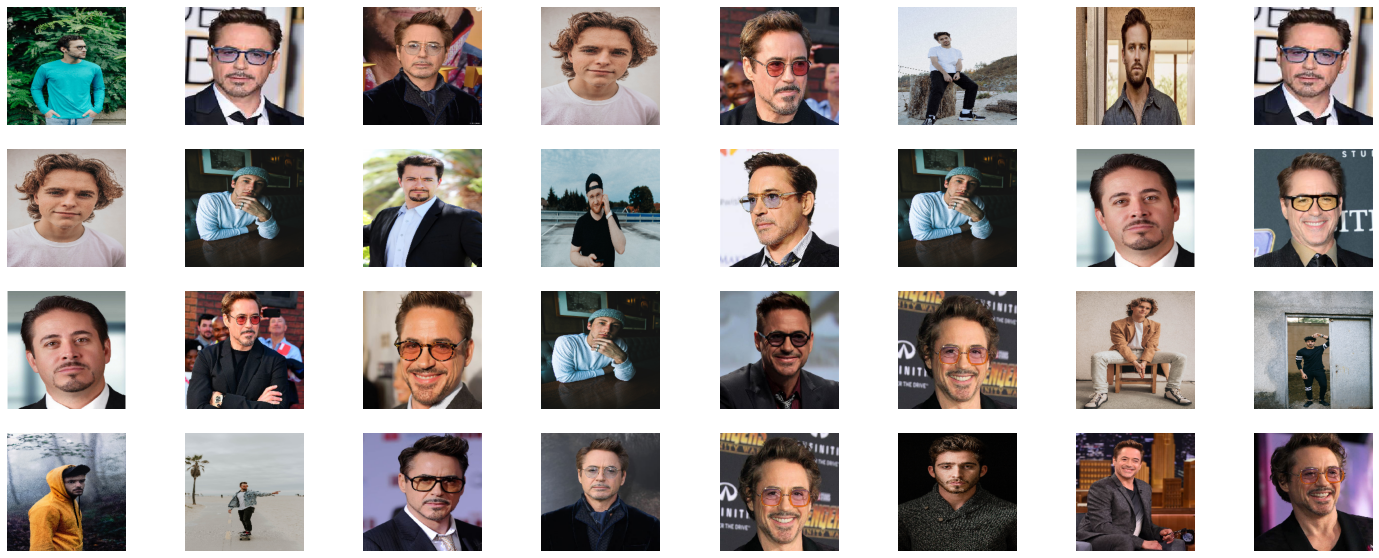

In [ ]:
fig, ax = plt.subplots(4, 8, figsize=(25, 10))

indexes = np.random.randint(len(y_test), size=32)

for i, idx in enumerate(indexes):
  plt.subplot(4, 8, i+1)
  plt.imshow(X_test[idx])
  plt.axis("off")

In [ ]:
resnet_history = resnet_model.fit(ds_train,
                         epochs = 15,
                         verbose = 1,
                         batch_size=32,
                         validation_data = ds_test)

Epoch 1/15
9/9 [==============================] - 113s 13s/step - loss: 1.0616 - accuracy: 0.5957 - val_loss: 1269.9517 - val_accuracy: 0.4412
Epoch 2/15
9/9 [==============================] - 119s 13s/step - loss: 0.6934 - accuracy: 0.6099 - val_loss: 510.8944 - val_accuracy: 0.5588
Epoch 3/15
9/9 [==============================] - 121s 14s/step - loss: 0.6435 - accuracy: 0.6950 - val_loss: 348.3187 - val_accuracy: 0.4412
Epoch 4/15
9/9 [==============================] - 123s 13s/step - loss: 0.5588 - accuracy: 0.7376 - val_loss: 20.2659 - val_accuracy: 0.6765
Epoch 5/15
9/9 [==============================] - 106s 11s/step - loss: 0.4488 - accuracy: 0.8227 - val_loss: 2360.2622 - val_accuracy: 0.4412
Epoch 6/15
9/9 [==============================] - 99s 11s/step - loss: 0.3244 - accuracy: 0.8298 - val_loss: 10653.7939 - val_accuracy: 0.4412
Epoch 7/15
9/9 [==============================] - 99s 11s/step - loss: 0.2689 - accuracy: 0.9007 - val_loss: 526.4052 - val_accuracy: 0.4412
Epoch

In [ ]:
pd.Series({k:v[-1] for k, v in resnet_history.history.items()})

loss            0.071185
accuracy        0.971631
val_loss        3.872631
val_accuracy    0.676471
dtype: float64

Після цього результат став трішки кращим проте не є ідеальним.